# Programming Assignment 1

## Part 1: Data Exploration and Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, SGDRegressor, SGDClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, SelectFromModel, SequentialFeatureSelector, SelectFpr, f_regression, f_classif 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import IsolationForest
from natsort import natsorted
from scipy import stats

In [2]:
# Load data
train_data_file = './data/train.csv'
train_df = pd.read_csv(train_data_file)

In [3]:
# Check feature types
numerical_columns = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = train_df.select_dtypes(include='object').columns.tolist()
int_columns = train_df.select_dtypes(include=int).columns.tolist()
float_columns = train_df.select_dtypes(include=float).columns.tolist()

### Q1 Dataset Overview

In [4]:
# Data overview
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

### Q2 Missing Values

In [5]:
# Check for missing values
missing_values = train_df.isnull().sum()
total_values = train_df.shape[0]
proportion_missing = 100*missing_values / total_values
proportion_missing = proportion_missing[proportion_missing > 0]
proportion_missing

C0     0.819441
C4     1.384572
C5     3.051710
C8     2.317039
C9     4.012433
C11    4.464538
C12    4.803617
C13    3.390788
C15    3.899407
C17    4.181972
C20    4.831873
C22    0.452105
C23    0.791184
C25    4.068946
C29    4.521051
dtype: float64

### Q3 Feature Distribution

Numerical features

In [6]:
# Define discrete and continuous columns
discrete_columns = ['C14', 'C16', 'C17', 'C18', 'C19', 'C21', 'C22', 'C23', 'C24', 'C25', 'C27']
continuous_columns = ['C6', 'C20', 'C26', 'C28', 'C29', 'C30']

In [7]:
# Distribution of the first 3 numerical features
train_df[numerical_columns[:3]].describe()

,C6,C14,C16
count,3539.000000,3539.000000,3539.000000
mean,66.324696,23.204012,0.683526
std,6.619953,7.427675,2.275012
min,47.500000,17.000000,0.000000
25%,62.500000,19.000000,0.000000
50%,66.550000,20.000000,0.000000
75%,70.000000,25.000000,0.000000
max,95.000000,70.000000,20.000000


In [8]:
# Calculate the median of the first three numerical features
median_values = np.median(train_df[numerical_columns[:3]], axis=0)
# Calculate the variance of the first three numerical features
variance_values = np.var(train_df[numerical_columns[:3]], axis=0)

range_values = np.ptp(train_df[numerical_columns[:3]], axis=0)

median_values, range_values, variance_values

(array([66.55, 20.  ,  0.  ]),
 C6     47.5
 C14    53.0
 C16    20.0
 dtype: float64,
 C6     43.811392
 C14    55.154762
 C16     5.174216
 dtype: float64)

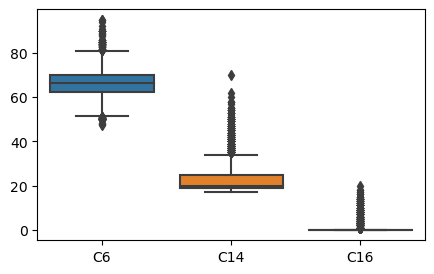

In [9]:
# Boxplot of the first 3 numerical features
plt.figure(figsize=(5,3))
sns.boxplot(data=train_df[numerical_columns[:3]])
plt.show()

Categorical features

In [10]:
# Define ordinal and nominal columns
ordinal_columns = ['C2','C5']
nominal_columns = ['C0','C1','C3','C4','C7','C8','C9','C10','C11','C12','C13','C15']

C:\Users\rmi87\AppData\Local\Temp\ipykernel_30420\1544261085.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(train_df[col].value_counts().index, rotation=90)  # Rotate x-axis labels
C:\Users\rmi87\AppData\Local\Temp\ipykernel_30420\1544261085.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(train_df[col].value_counts().index, rotation=90)  # Rotate x-axis labels
C:\Users\rmi87\AppData\Local\Temp\ipykernel_30420\1544261085.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(train_df[col].value_counts().index, rotation=90)  # Rotate x-axis labels


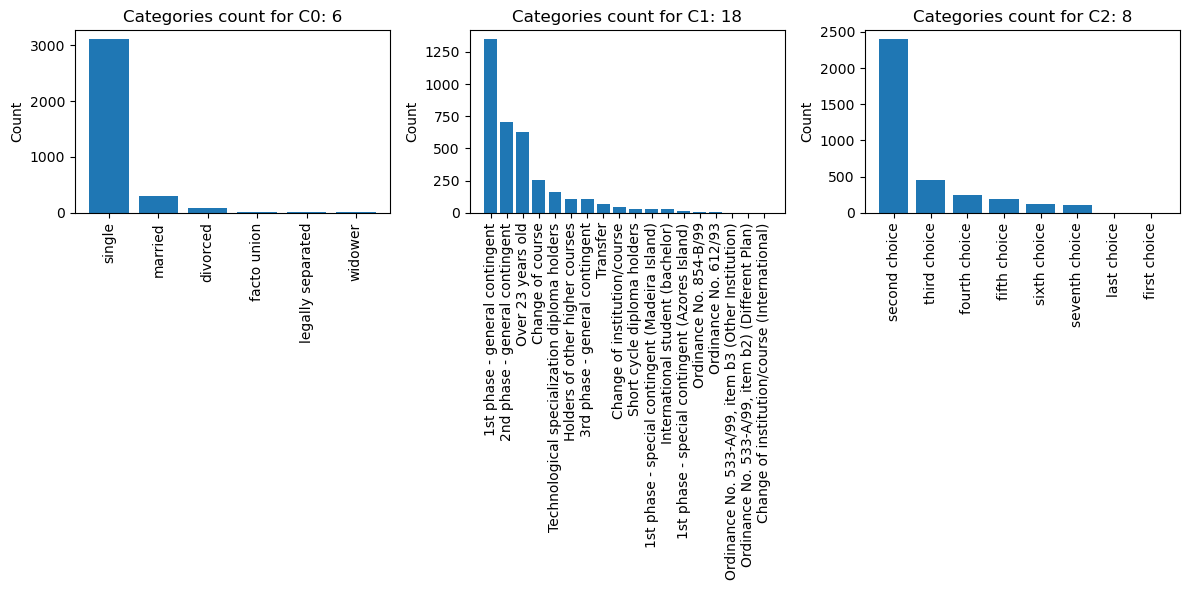

In [11]:
# Summarize the categories count of the first 3 categorical features and visualize their distributions using bar plots
unique_features_count = train_df[categorical_columns[:3]].nunique()
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, col in enumerate(categorical_columns[:3]):
    axes[i].bar(train_df[col].value_counts().index, train_df[col].value_counts().values)
    #axes[i].set_xlabel()
    axes[i].set_ylabel('Count')
    axes[i].set_title('Categories count for '+col+': '  + str(unique_features_count[i]))
    axes[i].set_xticklabels(train_df[col].value_counts().index, rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

### Q4 Outliers

IQR

In [12]:
# Calculate iqr for numerical columns
q1 = train_df[numerical_columns].dropna().quantile(0.25)
q3 = train_df[numerical_columns].dropna().quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers using iqr
outliers_iqr = train_df[(train_df[numerical_columns] < lower_bound) | (train_df[numerical_columns] > upper_bound)]

# Count outliers
outliers_iqr[numerical_columns[:3]].count()

C6     147
C14    340
C16    454
dtype: int64

Z-score

In [13]:
# Calculate z-scores for numerical columns
z_scores = stats.zscore(train_df[numerical_columns])

# Find outliers using a threshold of 3
outliers_z_score = train_df[(np.abs(z_scores) > 3)]

# Count outliers
outliers_z_score[numerical_columns[:3]].count()

C6      18
C14     79
C16    114
dtype: int64

### Q5 Correlation Analysis

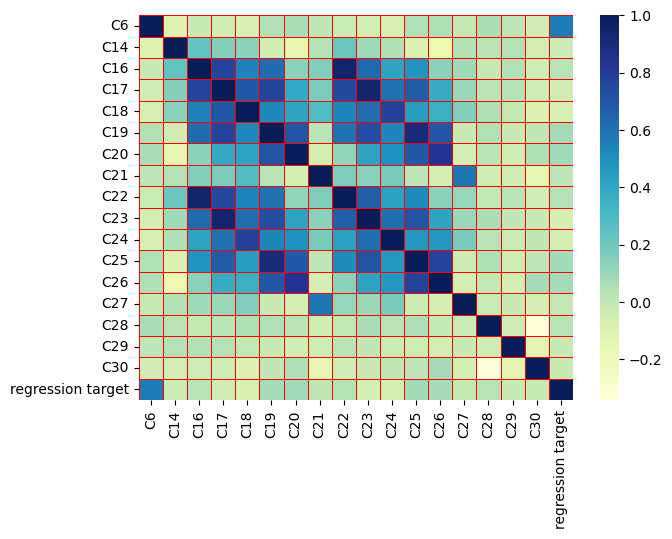

In [14]:
# Heatmap of numerical columns
plt.figure(figsize=(7,5))
sns.heatmap(train_df[numerical_columns].dropna().corr(), annot=False, cmap='YlGnBu', linecolor='r', linewidths=0.5)
plt.show()

## Part 2: Data Preprocessing Techniques

### Q7 Handling Missing Values

Mean and median only applicable to numerical data.\
Catagorical feature use mode \
Discrete feature use median. \
Continuous feature use mean or median based on distribution.

In [15]:
# Remove regression from preprocessing
float_columns.remove('regression target')
train_df_processed = train_df.copy()

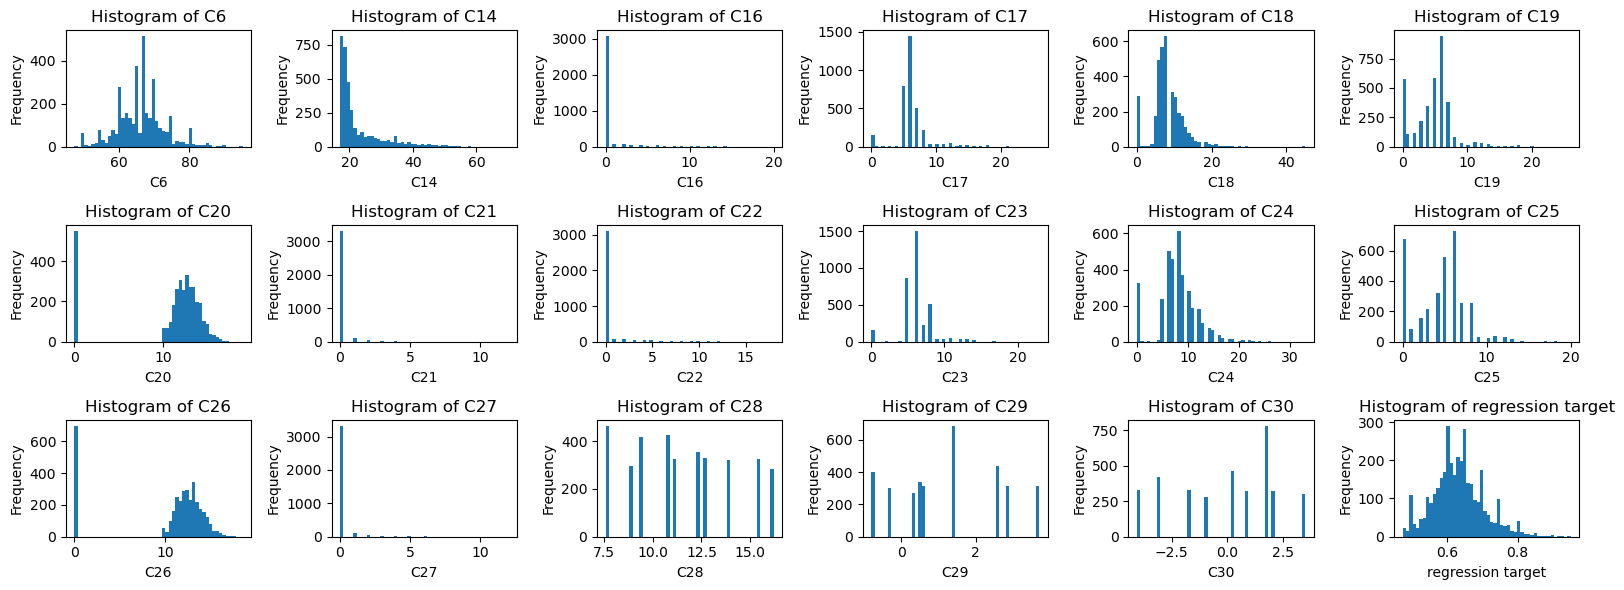

In [16]:
# Plot histograms for numerical features
fig, axes = plt.subplots(len(numerical_columns)//6, 6, figsize=(16, 6))
for i, col in enumerate(numerical_columns):
    rows = i//6
    cols = i%6
    axes[rows,cols].hist(train_df[col].dropna(), bins=50)
    axes[rows,cols].set_xlabel(col)
    axes[rows,cols].set_ylabel('Frequency')
    axes[rows,cols].set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()


In [17]:
# Correct the data types of the columns
false_float_columns = ['C17', 'C22', 'C23', 'C25']
for col in false_float_columns:
    float_columns.remove(col)
    int_columns.append(col)
int_columns.sort()

In [18]:
# Check mean, median and mode of continuous columns
print(train_df[['C6','C20','C26','C28', 'C29', 'C30']].dropna().mean())
print(train_df[['C6','C20','C26','C28', 'C29', 'C30']].dropna().median())
print(train_df[['C6','C20','C26','C28', 'C29', 'C30']].dropna().mode())

C6     66.326447
C20    10.587526
C26    10.211285
C28    11.571686
C29     1.238426
C30    -0.004512
dtype: float64
C6     66.550000
C20    12.285714
C26    12.200000
C28    11.100000
C29     1.400000
C30     0.320000
dtype: float64
      C6  C20  C26  C28  C29   C30
0  66.55  0.0  0.0  7.6  1.4  0.32


In [19]:
# Impute missing values
mode_imputer = SimpleImputer(strategy='most_frequent')
train_df_processed[categorical_columns] = mode_imputer.fit_transform(train_df_processed[categorical_columns])

mean_imputer = SimpleImputer(strategy='mean')
train_df_processed[['C6']] = mean_imputer.fit_transform(train_df_processed[['C6']])
median_imputer = SimpleImputer(strategy='median')
train_df_processed[int_columns] = median_imputer.fit_transform(train_df_processed[int_columns])
train_df_processed[['C28', 'C29', 'C30']] = median_imputer.fit_transform(train_df_processed[['C28', 'C29', 'C30']])
train_df_processed[['C20', 'C26']] = median_imputer.fit_transform(train_df_processed[['C20', 'C26']])

### Q8 Normalization and Standardization

In [20]:
# Define scalers
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [21]:
# Define the columns to be scaled
normal_columns = ['C14', 'C16', 'C21', 'C22', 'C27', 'C28', 'C29', 'C30']
std_columns = ['C6', 'C17', 'C18', 'C19', 'C23', 'C24', 'C25']
robust_columns = ['C20', 'C26']

In [22]:
# Scale the columns
train_df_processed[normal_columns] = minmax_scaler.fit_transform(train_df_processed[normal_columns])
train_df_processed[std_columns] = std_scaler.fit_transform(train_df_processed[std_columns])
train_df_processed[robust_columns] = robust_scaler.fit_transform(train_df_processed[robust_columns])

In [23]:
# First numerical feature column of the first 10 samples before and after processing
print('  Before\tAfter')
for i in range(10):
    values = train_df[numerical_columns[:1]].loc[i].values
    output1 = ' '.join(map(str, values))
    values = np.round(train_df_processed[numerical_columns[:1]].loc[i].values,5)
    output2 = ' '.join(map(str, values))
    print(f'{i} {output1}\t\t{output2}')

  Before	After
0 65.0		-0.20013
1 65.0		-0.20013
2 59.5		-1.03107
3 66.55		0.03404
4 71.0		0.70634
5 70.0		0.55526
6 57.5		-1.33323
7 65.5		-0.12459
8 70.0		0.55526
9 80.0		2.06606


### Q9 Encoding Categorical Variables

In [24]:
# Define the columns to be encoded
binary_columns = ['C4','C8','C9','C10','C11','C12','C13','C15','classification target']
ordinal_columns = ['C2','C5']
nominal_columns = ['C0','C1','C3','C7']

In [25]:
# Define the encoders
binary_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

C2_order = ['first choice', 'second choice', 'third choice', 'fourth choice', 'fifth choice', 'sixth choice', 'seventh choice', 'last choice']
C5_order = ['Basic education 2nd cycle (6th/7th/8th year) or equiv.', 'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 'Secondary education',\
            '10th year of schooling - not completed', '10th year of schooling', '11th year of schooling - not completed', 'Other - 11th year of schooling',\
            '12th year of schooling - not completed', 'Frequency of higher education', 'Higher education - degree (1st cycle)', 'Higher education - degree',\
            "Higher education - bachelor's degree", 'Technological specialization course', 'Professional higher technical course', 'Higher education - master (2nd cycle)',\
            "Higher education - master's", 'Higher education - doctorate']

ordinal_encoder = OrdinalEncoder(categories=[C2_order, C5_order])

In [26]:
# Binary encoding
train_df_processed[binary_columns] = binary_encoder.fit_transform(train_df_processed[binary_columns])

In [27]:
# One-hot encoding
onehot_encoded = onehot_encoder.fit_transform(train_df_processed[nominal_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))
onehot_encoded_df.head()
train_df_processed = pd.concat([train_df_processed, onehot_encoded_df], axis=1)
train_df_processed.drop(nominal_columns, axis=1, inplace=True)

In [28]:
# Ordinal encoding
train_df_processed[ordinal_columns] = ordinal_encoder.fit_transform(train_df_processed[ordinal_columns])


In [29]:
# Re-order columns
train_df_processed = train_df_processed.reindex(columns=natsorted(train_df_processed.columns))

In [30]:
# First categorical feature column of the first 10 samples before and after processing
print(train_df['C0'][:10])
print(onehot_encoded_df[onehot_encoded_df.columns.tolist()[:5]][:10])

0    divorced
1      single
2      single
3     married
4      single
5      single
6      single
7      single
8      single
9      single
Name: C0, dtype: object
   C0_facto union  C0_legally separated  C0_married  C0_single  C0_widower
0             0.0                   0.0         0.0        0.0         0.0
1             0.0                   0.0         0.0        1.0         0.0
2             0.0                   0.0         0.0        1.0         0.0
3             0.0                   0.0         1.0        0.0         0.0
4             0.0                   0.0         0.0        1.0         0.0
5             0.0                   0.0         0.0        1.0         0.0
6             0.0                   0.0         0.0        1.0         0.0
7             0.0                   0.0         0.0        1.0         0.0
8             0.0                   0.0         0.0        1.0         0.0
9             0.0                   0.0         0.0        1.0         0.0


### Q10 Feature Selection

In [31]:
# Define the target columns
classif_target = train_df_processed['classification target']
regress_target = train_df_processed['regression target']

In [32]:
# Define feature selection modules
var_selector = VarianceThreshold(threshold=0.1)
kbest_selector_linear = SelectKBest(k=10, score_func=f_regression)
kbest_selector_logistic = SelectKBest(k=10, score_func=f_classif)
rfe_selector_linear = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe_selector_logistic = RFE(estimator=SGDClassifier(loss='log_loss', random_state=4211), n_features_to_select=10)
sfm_selector_linear = SelectFromModel(estimator=LinearRegression())
sfm_selector_logistic = SelectFromModel(estimator=SGDClassifier(loss='log_loss', random_state=4211))
fpr_selector_linear = SelectFpr(score_func=f_regression)
fpr_selector_logistic = SelectFpr(score_func=f_classif)
sfs_selector_linear = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)
sfs_selector_logistic = SequentialFeatureSelector(estimator=SGDClassifier(loss='log_loss', random_state=4211), n_features_to_select=10)

In [33]:
# Feature selection
X_var = var_selector.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']))
var_features = train_df_processed.drop(columns=['classification target', 'regression target']).columns[var_selector.get_support()].tolist()

X_kbest_linear = kbest_selector_linear.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), classif_target)
kbest_features_linear = train_df_processed.drop(columns=['classification target', 'regression target']).columns[kbest_selector_linear.get_support()].tolist()

X_kbest_logistic = kbest_selector_logistic.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), regress_target)
kbest_features_logistic = train_df_processed.drop(columns=['classification target', 'regression target']).columns[kbest_selector_logistic.get_support()].tolist()

X_rfe_linear = rfe_selector_linear.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), regress_target)
rfe_features_linear = train_df_processed.drop(columns=['classification target', 'regression target']).columns[rfe_selector_linear.get_support()].tolist()

X_rfe_logistic = rfe_selector_logistic.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), classif_target)
rfe_features_logistic = train_df_processed.drop(columns=['classification target', 'regression target']).columns[rfe_selector_logistic.get_support()].tolist()

X_sfm_linear = sfm_selector_linear.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), regress_target)
sfm_features_linear = train_df_processed.drop(columns=['classification target', 'regression target']).columns[sfm_selector_linear.get_support()].tolist()

X_sfm_logistic = sfm_selector_logistic.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), classif_target)
sfm_features_logistic = train_df_processed.drop(columns=['classification target', 'regression target']).columns[sfm_selector_logistic.get_support()].tolist()

X_fpr_linear = fpr_selector_linear.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), regress_target)
fpr_features_linear = train_df_processed.drop(columns=['classification target', 'regression target']).columns[fpr_selector_linear.get_support()].tolist()

X_fpr_logistic = fpr_selector_logistic.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), classif_target)
fpr_features_logistic = train_df_processed.drop(columns=['classification target', 'regression target']).columns[fpr_selector_logistic.get_support()].tolist()

X_sfs_linear = sfs_selector_linear.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), regress_target)
sfs_features_linear = train_df_processed.drop(columns=['classification target', 'regression target']).columns[sfs_selector_linear.get_support()].tolist()

X_sfs_logistic = sfs_selector_logistic.fit_transform(train_df_processed.drop(columns=['classification target', 'regression target']), classif_target)
sfs_features_logistic = train_df_processed.drop(columns=['classification target', 'regression target']).columns[sfs_selector_logistic.get_support()].tolist()

c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [34]:
# Feature selection for regression
regress_selected_features = var_features + kbest_features_linear + rfe_features_linear + sfm_features_linear + fpr_features_linear + sfs_features_linear

feature_count = {}
for feature in regress_selected_features:
    if feature in feature_count:
        feature_count[feature] += 1
    else:
        feature_count[feature] = 1
# Sort feature_count based on count
sorted_features = sorted(feature_count.items(), key=lambda x: x[1], reverse=True)
regression_features = [feature for feature, count in sorted_features if count > 2]
regression_features

['C6',
 'C20',
 'C1_Ordinance No. 854-B/99',
 'C1_Over 23 years old',
 'C5',
 'C19',
 'C25',
 'C26',
 'C0_widower',
 'C7_Cuban',
 'C7_Mexican',
 'C7_Turkish',
 'C3_Animation and Multimedia Design']

In [35]:
# Feature selection for classification
classif_selected_features = var_features + kbest_features_logistic + rfe_features_logistic + sfm_features_logistic + fpr_features_logistic + sfs_features_logistic

feature_count = {}
for feature in classif_selected_features:
    if feature in feature_count:
        feature_count[feature] += 1
    else:
        feature_count[feature] = 1
# Sort feature_count based on count
sorted_features = sorted(feature_count.items(), key=lambda x: x[1], reverse=True)
classification_features = [feature for feature, count in sorted_features if count > 2]
classification_features

['C25',
 'C14',
 'C11',
 'C5',
 'C6',
 'C10',
 'C19',
 'C23',
 'C3_Animation and Multimedia Design']

### Q11 Feature Engineering

Do feature engineering on highly corelated features.

In [36]:
# Define potential feature engineering columns
high_corr_columns = ['C16', 'C17', 'C18', 'C19', 'C20', 'C22', 'C23', 'C24', 'C25', 'C26']

In [37]:
# Feature engineering
high_corr_features = train_df_processed[high_corr_columns].sum(axis=1)
high_corr_features_df = pd.DataFrame(high_corr_features, columns=['high_corr_features'])
train_df_processed = pd.concat([train_df_processed, high_corr_features_df], axis=1)

## Part 3: Regression

### Linear Regression

6 features: 'C1_Ordinance No. 854-B/99', 'C5', 'C6', 'C19', 'C20', 'C26'

In [38]:
# Define the columns to be used for regression
regress_features = ['C1_Ordinance No. 854-B/99','C5','C6','C19','C20','C26']

# Split the data into training and testing sets
trainX_C1, testX_C1, trainY_C1, testY_C1 = train_test_split(train_df_processed['C1_Ordinance No. 854-B/99'], regress_target, test_size=0.2, random_state=4211)
trainX_C5, testX_C5, trainY_C5, testY_C5 = train_test_split(train_df_processed['C5'], regress_target, test_size=0.2, random_state=4211)
trainX_C6, testX_C6, trainY_C6, testY_C6 = train_test_split(train_df_processed['C6'], regress_target, test_size=0.2, random_state=4211)
trainX_C19, testX_C19, trainY_C19, testY_C19 = train_test_split(train_df_processed['C19'], regress_target, test_size=0.2, random_state=4211)
trainX_C20, testX_C20, trainY_C20, testY_C20 = train_test_split(train_df_processed['C20'], regress_target, test_size=0.2, random_state=4211)
trainX_C26, testX_C26, trainY_C26, testY_C26 = train_test_split(train_df_processed['C26'], regress_target, test_size=0.2, random_state=4211)
trainX, testX, trainY, testY = train_test_split(train_df_processed[regress_features], regress_target, test_size=0.2, random_state=4211)

In [39]:
# Train the model
model = LinearRegression()

reg_C1 = model.fit(trainX_C1.values.reshape(-1, 1), trainY_C1)
pred_C1 = reg_C1.predict(testX_C1.values.reshape(-1, 1))

reg_C5 = model.fit(trainX_C5.values.reshape(-1, 1), trainY_C5)
pred_C5 = reg_C5.predict(testX_C5.values.reshape(-1, 1))

reg_C6 = model.fit(trainX_C6.values.reshape(-1, 1), trainY_C6)
pred_C6 = reg_C6.predict(testX_C6.values.reshape(-1, 1))

reg_C19 = model.fit(trainX_C19.values.reshape(-1, 1), trainY_C19)
pred_C19 = reg_C19.predict(testX_C19.values.reshape(-1, 1))

reg_C20 = model.fit(trainX_C20.values.reshape(-1, 1), trainY_C20)
pred_C20 = reg_C20.predict(testX_C20.values.reshape(-1, 1))

reg_C26 = model.fit(trainX_C26.values.reshape(-1, 1), trainY_C26)
pred_C26 = reg_C26.predict(testX_C26.values.reshape(-1, 1))

start = time.time()
reg = model.fit(trainX, trainY)
end = time.time()
linear_regress_train_time = end - start
pred = reg.predict(testX)

In [40]:
# Evaluate the model
r2_C1 = r2_score(testY_C1, pred_C1)
mse_C1 = mean_squared_error(testY_C1, pred_C1)

r2_C5 = r2_score(testY_C5, pred_C5)
mse_C5 = mean_squared_error(testY_C5, pred_C5)

r2_C6 = r2_score(testY_C6, pred_C6)
mse_C6 = mean_squared_error(testY_C6, pred_C6)

r2_C19 = r2_score(testY_C19, pred_C19)
mse_C19 = mean_squared_error(testY_C19, pred_C19)

r2_C20 = r2_score(testY_C20, pred_C20)
mse_C20 = mean_squared_error(testY_C20, pred_C20)

r2_C26 = r2_score(testY_C26, pred_C26)
mse_C26 = mean_squared_error(testY_C26, pred_C26)

r2 = r2_score(testY, pred)
mse = mean_squared_error(testY, pred)

### Q12, Q14

Q14: A feature with more than 2 categories (C1_Ordinance No. 854-B/99) is already selected in the regression features.

In [41]:
# R2 score results
r2s = [r2_C1, r2_C5, r2_C6, r2_C19, r2_C20, r2_C26, r2]
for i, col in enumerate(regress_features):
    print(f'{col}: {r2s[i]}')
print(f'Overall: {r2s[-1]}')

C1_Ordinance No. 854-B/99: 0.011548403410835295
C5: 0.046747019714568405
C6: 0.3457983455467898
C19: -0.007753410265295191
C20: -0.009428052250592733
C26: -0.007736001857362451
Overall: 0.3697990755132665


### Q13

In [42]:
# MSE results
mses = [mse_C1, mse_C5, mse_C6, mse_C19, mse_C20, mse_C26, mse]
for i, col in enumerate(regress_features):
    print(f'{col}: {mses[i]}')
print(f'Combined: {mses[-1]}')

C1_Ordinance No. 854-B/99: 0.004808237669322762
C5: 0.0046370170315053385
C6: 0.0031823076103367387
C19: 0.004902129679739934
C20: 0.00491027583146261
C26: 0.004902044998038702
Combined: 0.0030655581262807965


### Feed Forward Neural Network

In [43]:
# Hidden layer sizes
H = [1,8,32,128]
train_time_mlp_r = np.zeros((len(H), 3))
r2_scores = np.zeros((len(H), 3))

In [44]:
# Train the model
for i, h in enumerate(H):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(h,h,h), early_stopping=True)
    #print(h)
    for j in range(3):
        start = time.time()
        mlp_regressor.fit(trainX, trainY)
        end = time.time()
        train_time_mlp_r[i,j] = end - start
        pred = mlp_regressor.predict(testX)
        r2_scores[i,j] = r2_score(testY, pred)

c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Q15

In [45]:
# Mean and standard deviation of the results
mean_train_time_mlp_r = np.mean(train_time_mlp_r, axis=1)
std_train_time_mlp_r = np.std(train_time_mlp_r, axis=1)
mean_r2_scores = np.mean(r2_scores, axis=1)
std_r2_scores = np.std(r2_scores, axis=1)

In [46]:
# Results
print(f'Mean train time: {mean_train_time_mlp_r}')
print(f'Std train time: {std_train_time_mlp_r}')
print(f'Mean R2 score: {mean_r2_scores}')
print(f'Std R2 score: {std_r2_scores}')

Mean train time: [0.91607976 0.99840204 0.9218332  0.79951278]
Std train time: [0.25944911 0.25876296 0.28536175 0.27510935]
Mean R2 score: [-1.50292545  0.30425355  0.34659805  0.3933461 ]
Std R2 score: [2.41582345 0.09595114 0.02095513 0.01608883]


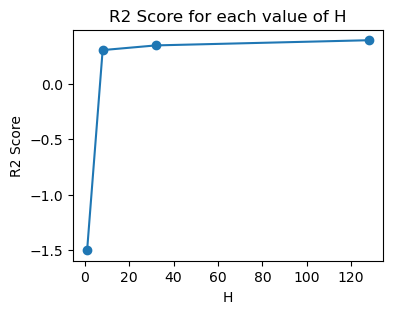

In [47]:
# Plot the R2 scores  
plt.figure(figsize=(4,3))
plt.plot(H, mean_r2_scores, marker='o')
plt.xlabel('H')
plt.ylabel('R2 Score')
plt.title('R2 Score for each value of H')
plt.show()


### Q16

In [48]:
# Compare the models
models = ['Linear Regression', 'Feedforward Neural Network']
train_time_values = [linear_regress_train_time, mean_train_time_mlp_r[np.argmax(mean_r2_scores)]]
r2_values = [r2, np.max(mean_r2_scores)]
for i in range(2):
    print(f'{models[i]}:\nTrain time: {train_time_values[i]:.5f}, R2 Score: {r2_values[i]:.5f}\n')

Linear Regression:
Train time: 0.00000, R2 Score: 0.36980

Feedforward Neural Network:
Train time: 0.79951, R2 Score: 0.39335



## Part 4: Classification

### Logistic Regression

### Q17

In [49]:
# Define the columns to be used for classification
classif_features = classification_features
trainX, testX, trainY, testY = train_test_split(train_df_processed[classif_features], classif_target, test_size=0.2, random_state=4211)

In [50]:
# Learning rates
step = np.logspace(-4, -1, 4)
train_time = np.zeros((len(step), 3))
acc = np.zeros((len(step), 3))
f1 = np.zeros((len(step), 3))

In [51]:
# Train the model
for i, h in enumerate(step):
    logistic_regress = SGDClassifier(loss='log_loss', eta0=h, learning_rate='optimal')
    for j in range(3):
        start = time.time()
        logistic_regress.fit(trainX, trainY)
        end = time.time()
        train_time[i,j] = end - start
        pred =  logistic_regress.predict(testX)
        acc[i,j] = accuracy_score(testY, pred)
        f1[i,j] = f1_score(testY, pred, average='weighted')

In [52]:
# Mean and standard deviation of the results
mean_train_time_lr = np.mean(train_time, axis=1)
std_train_time_lr = np.std(train_time, axis=1)
mean_acc_lr = np.mean(acc, axis=1)
std_acc_lr = np.std(acc, axis=1)
mean_f1_lr = np.mean(f1, axis=1)
std_f1_lr = np.std(f1, axis=1)

In [53]:
# Results
print(f'Step: {step}')
print(f'Mean train time: {mean_train_time_lr}')
print(f'Std train time: {std_train_time_lr}')
print(f'Mean accuracy: {mean_acc_lr}')
print(f'Std accuracy score: {std_acc_lr}')
print(f'Mean F1 score: {mean_f1_lr}')
print(f'Std F1 score: {std_f1_lr}')

Step: [0.0001 0.001  0.01   0.1   ]
Mean train time: [0.02321688 0.01837238 0.02483503 0.01413043]
Std train time: [0.00484038 0.00586841 0.00812793 0.00287667]
Mean accuracy: [0.85828625 0.86723164 0.86016949 0.86770245]
Std accuracy score: [0.02290092 0.00985332 0.00900712 0.01531399]
Mean F1 score: [0.85486896 0.86180619 0.85322865 0.86352934]
Std F1 score: [0.01859662 0.00921284 0.00980274 0.01636555]


### Q18

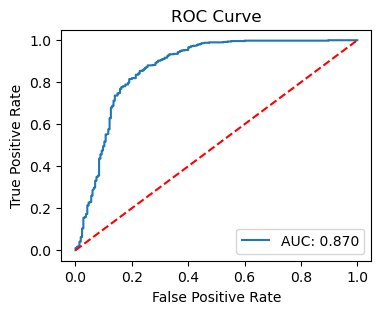

In [54]:
# Get the predicted probabilities for the positive class
probs = logistic_regress.predict_proba(testX)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY, probs)

# Calculate the AUC value
auc_value = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f'AUC: {auc_value:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Add diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Feedforward Neural Networks

In [55]:
# Hidden layer sizes
H = [1,8,32,128]
train_time_mlp_c = np.zeros((len(H), 3))
acc = np.zeros((len(H), 3))
f1 = np.zeros((len(H), 3))

In [56]:
# Train the model
for i, h in enumerate(H):
    mlp_classif = MLPClassifier(hidden_layer_sizes=(h,h,h), early_stopping=True, solver='sgd')
    for j in range(3):
        start = time.time()
        mlp_classif.fit(trainX, trainY)
        end = time.time()
        train_time_mlp_c[i,j] = end - start
        pred = mlp_classif.predict(testX)
        acc[i,j] = accuracy_score(testY, pred)
        f1[i,j] = f1_score(testY, pred, average='weighted')

In [57]:
# Mean and standard deviation of the results
mean_train_time_mlp_c = np.mean(train_time_mlp_c, axis=1)
std_train_time_mlp_c = np.std(train_time_mlp_c, axis=1)
mean_acc_mlp_c = np.mean(acc, axis=1)
std_acc_mlp_c = np.std(acc, axis=1)
mean_f1_mlp_c = np.mean(f1, axis=1)
std_f1_mlp_c = np.std(f1, axis=1)

### Q20

In [58]:
# Results
print(f'Mean train time: {mean_train_time_mlp_c}')
print(f'Std train time: {std_train_time_mlp_c}')
print(f'Mean accuracy: {mean_acc_mlp_c}')
print(f'Std accuracy score: {std_acc_mlp_c}')
print(f'Mean F1 score: {mean_f1_mlp_c}')
print(f'Std F1 score: {std_f1_mlp_c}')

Mean train time: [0.08022642 0.35109878 0.54772417 1.81076423]
Std train time: [0.00277016 0.22281715 0.28506704 0.61133515]
Mean accuracy: [0.43455744 0.74246704 0.80602637 0.86299435]
Std accuracy score: [0.18509952 0.06525091 0.07758797 0.01585448]
Mean F1 score: [0.2848726  0.66274012 0.76042969 0.85524405]
Std F1 score: [0.2027984  0.11537647 0.13347197 0.01755754]


### Q21

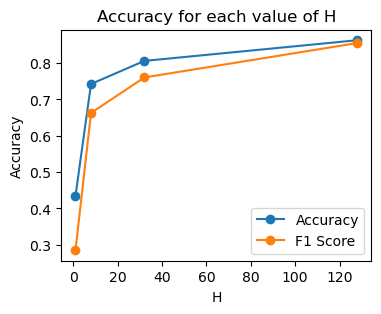

In [59]:
# Plot the accuracy and F1 scores
plt.figure(figsize=(4,3))
plt.plot(H, mean_acc_mlp_c, marker='o', label='Accuracy')
plt.plot(H, mean_f1_mlp_c, marker='o', label='F1 Score')
plt.xlabel('H')
plt.ylabel('Accuracy')
plt.title('Accuracy for each value of H')
plt.legend(loc='lower right')
plt.show()

In [60]:
# Count of the classification target categories
classification_target_counts = classif_target.value_counts()
print(classification_target_counts)


classification target
1.0    2434
0.0    1105
Name: count, dtype: int64


### Q22

In [61]:
# Compare the models
models = ['Logistic Regression', 'Feedforward Neural Network']
train_time_values_2 = [mean_train_time_lr[np.argmax(mean_f1_lr)], mean_train_time_mlp_c[np.argmax(mean_f1_mlp_c)]]
acc_values = [mean_acc_lr[np.argmax(mean_f1_lr)], np.max(mean_acc_mlp_c)]
f1_values = [np.max(mean_f1_lr), np.max(mean_f1_mlp_c)]
for i in range(2):
    print(f'{models[i]}:\nTrain time: {train_time_values_2[i]:.5f}, Accuracy: {acc_values[i]:.5f}, f1 score: {f1_values[i]:.5f}\n')

Logistic Regression:
Train time: 0.01413, Accuracy: 0.86770, f1 score: 0.86353

Feedforward Neural Network:
Train time: 1.81076, Accuracy: 0.86299, f1 score: 0.85524



### Part 5: Performance Enhancement

In [62]:
# Fixed model for combination comparison
trainX, testX, trainY, testY = train_test_split(train_df.drop(columns=['classification target', 'regression target'],axis=1), train_df['classification target'], test_size=0.2, random_state=4211)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True, solver='sgd')

### Q24 Combination A

For numerical features, apply StandardScaler and SimpleImputer with mean strategy for imputation. For categorical features, use OneHotEncoder for encoding.

In [63]:
numeric_features = train_df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('regression target')
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

In [64]:
categorical_features = train_df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('classification target')
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
    ])

In [65]:
comb_a_preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

comb_a_model = Pipeline(
    steps=[
        ('preprocessor', comb_a_preprocess),
        ('classifier', mlp_classifier)
    ]
)

### Q25 Combination B

For numerical features, use MinMaxScaler for normalization and SimpleImputer with zero strategy for imputation. For categorical features, encode ordinal features with OrdinalEncoder and remaining with OneHotEncoder.

In [66]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', MinMaxScaler())
    ])

In [67]:
ordinal_features = ordinal_columns
ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[C2_order, C5_order]))
    ])

not_ordinal_features = nominal_columns+binary_columns
not_ordinal_features.remove('classification target')
not_ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
    ])

In [68]:
comb_b_preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('not_ord', not_ordinal_transformer, not_ordinal_features)
    ]
)

comb_b_model = Pipeline(
    steps=[
        ('preprocessor', comb_b_preprocess),
        ('classifier', mlp_classifier)
    ]
)

### Q26 Combination C

Numerical features are imputed with KNNImputer with k=5. Discrete numerical features are scaled using RobustScaler, and continuous numerical features are scaled using StandardScaler. Categorical features are imputed with SimpleImputer 'mode' strategy. Ordinal features are encoded with OrdinalEncoder, and the remaining are encoded with OneHotEncoder.

In [69]:
discrete_features = discrete_columns
discrete_transformer = Pipeline(
    steps=[
        #('outlier_detector', IsolationForest()),
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', RobustScaler())
    ])

continuous_features = continuous_columns
continuous_transformer = Pipeline(
    steps=[
        #('outlier_detector', IsolationForest()),
        ('imputer', KNNImputer(n_neighbors=5)),#SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

In [70]:
ordinal_features = ordinal_columns
ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[C2_order, C5_order]))
    ])

not_ordinal_features = nominal_columns+binary_columns
not_ordinal_features.remove('classification target')
not_ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
    ])

In [71]:
comb_c_preprocess = ColumnTransformer(
    transformers=[
        ('discrete', discrete_transformer, discrete_features),
        ('continuous', continuous_transformer, continuous_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('not_ord', not_ordinal_transformer, not_ordinal_features)
    ]
)

comb_c_model = Pipeline(
    steps=[
        ('preprocessor', comb_c_preprocess),
        #('feature_selection', SelectKBest(k=10, score_func=f_classif)),
        ('classifier', mlp_classifier)
    ]
)

In [72]:
# Validate the combinations
rounds = 3
acc_array = np.zeros((3,rounds))
f1_array = np.zeros((3,rounds))
for i, model in enumerate([comb_a_model, comb_b_model, comb_c_model]):
    for j in range(rounds):
        model.fit(trainX, trainY)
        pred = model.predict(testX)
        acc_array[i,j] = accuracy_score(testY, pred)
        f1_array[i,j] = f1_score(testY, pred, average='weighted')

print('\tA\tB\tC')
print(f'{np.mean(acc_array, axis=1)}')
print(f'{np.std(acc_array, axis=1)}')
print(f'{np.mean(f1_array, axis=1)}')
print(f'{np.std(f1_array, axis=1)}')

c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rmi87\.conda\envs\course02450

	A	B	C
[0.84416196 0.7019774  0.78954802]
[0.01311524 0.00599243 0.06697755]
[0.8373403  0.59985148 0.77789729]
[0.01423113 0.03341152 0.06907071]


c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Hyperparameter Tuning

In [73]:
# New dataframe for hyperparameter tuning
train_df_best = train_df.copy()

In [74]:
# Impute missing values
mode_imputer = SimpleImputer(strategy='most_frequent')
train_df_best[categorical_columns] = mode_imputer.fit_transform(train_df_best[categorical_columns])

knn_imputer = KNNImputer(n_neighbors=5)
train_df_best[discrete_features] = knn_imputer.fit_transform(train_df_best[discrete_features])
train_df_best[continuous_features] = knn_imputer.fit_transform(train_df_best[continuous_features])

In [75]:
# Scale the columns
train_df_best[discrete_features] = robust_scaler.fit_transform(train_df_best[discrete_features])
train_df_best[continuous_features] = std_scaler.fit_transform(train_df_best[continuous_features])

In [76]:
# Ordinal encoding
train_df_best[ordinal_columns] = ordinal_encoder.fit_transform(train_df_best[ordinal_columns])

# Binary encoding
train_df_best[binary_columns] = binary_encoder.fit_transform(train_df_best[binary_columns])

# One-hot encoding
onehot_encoded = onehot_encoder.fit_transform(train_df_best[nominal_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))
onehot_encoded_df.head()
train_df_best = pd.concat([train_df_best, onehot_encoded_df], axis=1)
train_df_best.drop(nominal_columns, axis=1, inplace=True)

# Re-order columns
train_df_best = train_df_best.reindex(columns=natsorted(train_df_best.columns))

In [77]:
# Perform grid search cross-validation
trainX, testX, trainY, testY = train_test_split(train_df_best[classif_features], train_df_best['classification target'], test_size=0.2, random_state=4211)

classifier = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(8,8,8), (32,32,32)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'early_stopping': [True],
    'random_state': [4211]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(trainX, trainY)

c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\rmi87\.conda\envs\course02450\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to c

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(8, 8, 8), (32, 32, 32)],
                         'random_state': [4211],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [78]:
# Access the results
results_df = pd.DataFrame(grid_search.cv_results_)
comb = results_df[['param_activation', 'param_hidden_layer_sizes', 'param_solver', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Save results to csv file
comb.sort_values(by='rank_test_score', inplace=True)
comb.to_csv('comb.csv', index=False)

C:\Users\rmi87\AppData\Local\Temp\ipykernel_30420\2124833988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb.sort_values(by='rank_test_score', inplace=True)


In [79]:
# Show results
comb

,param_activation,param_hidden_layer_sizes,param_solver,mean_test_score,std_test_score,rank_test_score
7,tanh,"(8, 8, 8)",adam,0.870008,0.009558,1
4,relu,"(32, 32, 32)",adam,0.867888,0.011931,2
1,relu,"(8, 8, 8)",adam,0.865415,0.010901,3
2,relu,"(8, 8, 8)",lbfgs,0.863647,0.010863,4
10,tanh,"(32, 32, 32)",adam,0.862587,0.015746,5
8,tanh,"(8, 8, 8)",lbfgs,0.856940,0.009166,6
0,relu,"(8, 8, 8)",sgd,0.852698,0.017825,7
6,tanh,"(8, 8, 8)",sgd,0.851290,0.012197,8
5,relu,"(32, 32, 32)",lbfgs,0.848106,0.013633,9
3,relu,"(32, 32, 32)",sgd,0.846692,0.016479,10
